In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
mpl.__version__ #data visualization 

'3.5.3'

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
plt.style.use('seaborn-paper')
#'classic' template is default

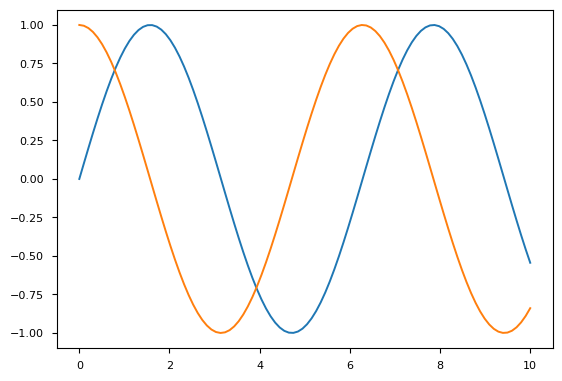

In [5]:
x=np.linspace(0,10,100)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

plt.show()
# matplotlib built on top of numpy

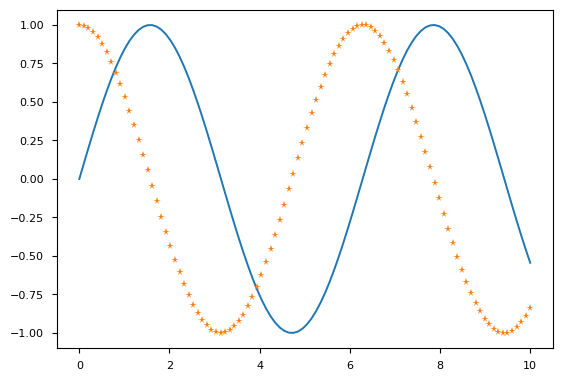

In [6]:
%matplotlib inline
fig=plt.figure()
x=np.linspace(0,10,100)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x),'*')

In [7]:
#saving the figure.
fig.savefig('lab1_fig1.png')

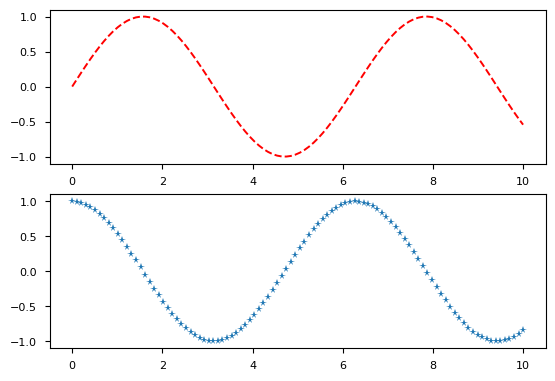

In [8]:
fig2=plt.figure()
plt.subplot(2,1,1)
plt.plot(x,np.sin(x),'--',color='red')

plt.subplot(2,1,2)
plt.plot(x,np.cos(x),'*')


In [9]:
#mongodb practice
import pymongo

In [10]:
from pymongo import MongoClient
client=MongoClient()
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [11]:
#database creation.
db_blog=client['db_blog']
db_blog

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'db_blog')

In [12]:
# Return a list of database names
client.list_database_names()

['admin', 'config', 'local']

In [13]:
# Create a collection (table)
# Assign the collection into a variable
call_posts=db_blog['posts']
call_posts

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'db_blog'), 'posts')

In [14]:
db_blog.list_collection_names()

[]

In [16]:
# First create a document
post_1 = {
"author": "Jack",
"title": "Introduction to MongoDB with Python",
"tags": ["mongodb", "python", "pymongo"]
}

insert_one_result= call_posts.insert_one(post_1)
print(f'first document Id: {insert_one_result.inserted_id}')



first document Id: 63b17b8a411700fe24b8facc


In [17]:
post_2 ={
    'author': 'Rifat Hossain',
    'title':'Advance Machine learning with Rifat',
    'tags':['python','Machine Learning','numpy','Pandas','matplotlib','seaburn'],
    'price':'20000'
    }
r=call_posts.insert_one(post_2)
print(f'Second document Id: {r.inserted_id}')

Second document Id: 63b17cd2411700fe24b8facd


In [19]:
print(client.list_database_names())

['admin', 'config', 'db_blog', 'local']


In [22]:
print(db_blog.list_collection_names())

['posts']


In [23]:
user_data=client['user_data']

In [24]:
table=user_data['table_1']

In [25]:
user_1={
    'name':'Rifat hossain',
    'Id':'20-42461-1',
    'phone':'01730941406'
}
user_2={
    'name':'jahidul Islam',
    'Id':'20-42461-1',
    'phone':'01730940000'
}


In [30]:
result_1=table.insert_one(user_1)
result_2=table.insert_one(user_2)
print(result_1.inserted_id )
print(result_2.inserted_id)

DuplicateKeyError: E11000 duplicate key error collection: user_data.table_1 index: _id_ dup key: { _id: ObjectId('63b17fcf411700fe24b8face') }, full error: {'index': 0, 'code': 11000, 'errmsg': "E11000 duplicate key error collection: user_data.table_1 index: _id_ dup key: { _id: ObjectId('63b17fcf411700fe24b8face') }", 'keyPattern': {'_id': 1}, 'keyValue': {'_id': ObjectId('63b17fcf411700fe24b8face')}}

In [31]:
print(user_data.list_collection_names())

['table_1']


In [32]:
client.list_database_names()

['admin', 'config', 'db_blog', 'local', 'user_data']

In [34]:
print(user_data.list_collection_names())

['table_1']


In [36]:
user_3={
    'name':'anwar hossain',
    'Id':'20-42464-1',
    'phone':'01941406'
}
user_4={
    'name':'jahidul Islam',
    'Id':'2461-1',
    'phone':'30940000'
}

post_3 ={
    'author': 'Rifat Hossain',
    'title':'Machine learning with Rifat',
    'tags':['python','Machine Learning','numpy','Pandas','matplotlib','seaburn'],
    'price':'2000'
    }
post_4 ={
    'author': 'Rifat Hossain',
    'title':'  learning with Rifat',
    'tags':['python','Machine Learning','numpy','Pandas','matplotlib','seaburn'],
    'price':'200'
    }

insert_many_result_1 = call_posts.insert_many([post_3, post_4])
insert_many_result_2 = table.insert_many([user_3, user_4])

In [37]:
insert_many_result_1.inserted_ids

[ObjectId('63b1829a411700fe24b8fad0'), ObjectId('63b1829a411700fe24b8fad1')]

In [38]:
insert_many_result_2.inserted_ids

[ObjectId('63b1829a411700fe24b8fad2'), ObjectId('63b1829a411700fe24b8fad3')]

In [39]:
# Create fourth document
post_5 = {
"_id": "44a33b55c77d99e13f444",
"author": "Angela",
"title": "A discussion on SQL vs NoSQL Database",
"tags": ["sql", "nosql", "database"]
}
# Create fifth document
post_6 = {
"_id": "55a44b66c88d24e68f555",
"author": "Jorge",
"title": "Essential tools for Data Science in Python",
"tags": ["pyhton", "numpy", "pandas", "matplotlib", "seaborn"]
}
insert_many_result_1 = call_posts.insert_many([post_5, post_6])
insert_many_result_1.inserted_ids

['44a33b55c77d99e13f444', '55a44b66c88d24e68f555']

In [40]:
print(call_posts.find_one())

{'_id': ObjectId('63b17b70411700fe24b8facb'), 'author': 'Jack', 'title': 'Introduction to MongoDB with Python', 'tags': ['mongodb', 'python', 'pymongo']}


In [41]:
call_posts.find()

In [43]:
# Retrieve all documents in our collection
for post in call_posts.find():
    print(post)
    print("------")

{'_id': ObjectId('63b17b70411700fe24b8facb'), 'author': 'Jack', 'title': 'Introduction to MongoDB with Python', 'tags': ['mongodb', 'python', 'pymongo']}
------
{'_id': ObjectId('63b17b8a411700fe24b8facc'), 'author': 'Jack', 'title': 'Introduction to MongoDB with Python', 'tags': ['mongodb', 'python', 'pymongo']}
------
{'_id': ObjectId('63b17cd2411700fe24b8facd'), 'author': 'Rifat Hossain', 'title': 'Advance Machine learning with Rifat', 'tags': ['python', 'Machine Learning', 'numpy', 'Pandas', 'matplotlib', 'seaburn'], 'price': '20000'}
------
{'_id': ObjectId('63b1829a411700fe24b8fad0'), 'author': 'Rifat Hossain', 'title': 'Machine learning with Rifat', 'tags': ['python', 'Machine Learning', 'numpy', 'Pandas', 'matplotlib', 'seaburn'], 'price': '2000'}
------
{'_id': ObjectId('63b1829a411700fe24b8fad1'), 'author': 'Rifat Hossain', 'title': '  learning with Rifat', 'tags': ['python', 'Machine Learning', 'numpy', 'Pandas', 'matplotlib', 'seaburn'], 'price': '200'}
------
{'_id': '44a3

In [44]:
# Retrieve all documents in our collection
for post in table.find():
    print(post)
    print("------")

{'_id': ObjectId('63b17fcf411700fe24b8face'), 'name': 'Rifat hossain', 'Id': '20-42461-1', 'phone': '01730941406'}
------
{'_id': ObjectId('63b17fcf411700fe24b8facf'), 'name': 'jahidul Islam', 'Id': '20-42461-1', 'phone': '01730940000'}
------
{'_id': ObjectId('63b1829a411700fe24b8fad2'), 'name': 'anwar hossain', 'Id': '20-42464-1', 'phone': '01941406'}
------
{'_id': ObjectId('63b1829a411700fe24b8fad3'), 'name': 'jahidul Islam', 'Id': '2461-1', 'phone': '30940000'}
------


In [46]:
import pprint
for post in call_posts.find():
    pprint.pprint(post)
    print("------")

{'_id': ObjectId('63b17b70411700fe24b8facb'),
 'author': 'Jack',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python'}
------
{'_id': ObjectId('63b17b8a411700fe24b8facc'),
 'author': 'Jack',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python'}
------
{'_id': ObjectId('63b17cd2411700fe24b8facd'),
 'author': 'Rifat Hossain',
 'price': '20000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Advance Machine learning with Rifat'}
------
{'_id': ObjectId('63b1829a411700fe24b8fad0'),
 'author': 'Rifat Hossain',
 'price': '2000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Machine learning with Rifat'}
------
{'_id': ObjectId('63b1829a411700fe24b8fad1'),
 'author': 'Rifat Hossain',
 'price': '200',
 'tags': ['python',
  

In [47]:
# Returns 'author' and `title` fields of the document
for post in call_posts.find({}, {"_id": 0, "author": 1, "title": 1}):
    pprint.pprint(post)

{'author': 'Jack', 'title': 'Introduction to MongoDB with Python'}
{'author': 'Jack', 'title': 'Introduction to MongoDB with Python'}
{'author': 'Rifat Hossain', 'title': 'Advance Machine learning with Rifat'}
{'author': 'Rifat Hossain', 'title': 'Machine learning with Rifat'}
{'author': 'Rifat Hossain', 'title': '  learning with Rifat'}
{'author': 'Angela', 'title': 'A discussion on SQL vs NoSQL Database'}
{'author': 'Jorge', 'title': 'Essential tools for Data Science in Python'}


In [49]:
# Return document(s) where "author" is "Jill"
for post in call_posts.find({"author": "Jill"}):
    pprint.pprint(post)

In [50]:
#To find the documents where the "author" is "Masha" or "Jack"
for post in call_posts.find({"author": {"$regex": "Rifat|Jack"} }):
    pprint.pprint(post)
    print("-----")

{'_id': ObjectId('63b17b70411700fe24b8facb'),
 'author': 'Jack',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python'}
-----
{'_id': ObjectId('63b17b8a411700fe24b8facc'),
 'author': 'Jack',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python'}
-----
{'_id': ObjectId('63b17cd2411700fe24b8facd'),
 'author': 'Rifat Hossain',
 'price': '20000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Advance Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad0'),
 'author': 'Rifat Hossain',
 'price': '2000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad1'),
 'author': 'Rifat Hossain',
 'price': '200',
 'tags': ['python',
      

In [52]:
#To find the documents where the "author" names
# contain one of the specified characters [abcd]
for post in call_posts.find({"author": {"$regex": "[abcd]"} }):
    pprint.pprint(post)
    print("-----")

{'_id': ObjectId('63b17b70411700fe24b8facb'),
 'author': 'Jack',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python'}
-----
{'_id': ObjectId('63b17b8a411700fe24b8facc'),
 'author': 'Jack',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python'}
-----
{'_id': ObjectId('63b17cd2411700fe24b8facd'),
 'author': 'Rifat Hossain',
 'price': '20000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Advance Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad0'),
 'author': 'Rifat Hossain',
 'price': '2000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad1'),
 'author': 'Rifat Hossain',
 'price': '200',
 'tags': ['python',
      

In [53]:
# Returns all documents in descending order by "author" names
for post in call_posts.find().sort("author", -1):
    pprint.pprint(post)
    print("-----")

{'_id': ObjectId('63b17cd2411700fe24b8facd'),
 'author': 'Rifat Hossain',
 'price': '20000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Advance Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad0'),
 'author': 'Rifat Hossain',
 'price': '2000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad1'),
 'author': 'Rifat Hossain',
 'price': '200',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': '  learning with Rifat'}
-----
{'_id': '55a44b66c88d24e68f555',
 'author': 'Jorge',
 'tags': ['pyhton', 'numpy', 'pandas', 'matplotlib', 'seaborn'],
 'title': 'Essential tools for Data Science in Python'}
--

In [56]:
# Let's update "author" name "Jorge" by "Micky"
# Define the query object
query = { "author": "Jack" }
# Define the object to set new value
new_author = { "$set": { "author": "Micky" } }
# Perform the update operation
call_posts.update_one(query, new_author)
# Now see all the documents
for post in call_posts.find():
    pprint.pprint(post)
    print("-----")

{'_id': ObjectId('63b17b70411700fe24b8facb'),
 'author': 'Micky',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python'}
-----
{'_id': ObjectId('63b17b8a411700fe24b8facc'),
 'author': 'Micky',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python'}
-----
{'_id': ObjectId('63b17cd2411700fe24b8facd'),
 'author': 'Rifat Hossain',
 'price': '20000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Advance Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad0'),
 'author': 'Rifat Hossain',
 'price': '2000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad1'),
 'author': 'Rifat Hossain',
 'price': '200',
 'tags': ['python',
    

In [57]:
# Let's update all documents where "author" names start with "M"
# Set the query object
query = { "author": { "$regex": "^M" } }
# Define the object to set new value
new_field = { "$set": { "type": "Cartoon" } }
# Perform the update operation
call_posts.update_many(query, new_field)
# Now see all the documents
for post in call_posts.find():
    pprint.pprint(post)
    print("-----")

{'_id': ObjectId('63b17b70411700fe24b8facb'),
 'author': 'Micky',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python',
 'type': 'Cartoon'}
-----
{'_id': ObjectId('63b17b8a411700fe24b8facc'),
 'author': 'Micky',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python',
 'type': 'Cartoon'}
-----
{'_id': ObjectId('63b17cd2411700fe24b8facd'),
 'author': 'Rifat Hossain',
 'price': '20000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Advance Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad0'),
 'author': 'Rifat Hossain',
 'price': '2000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad1'),
 'author': 'Rifat Hossain',
 

In [58]:
# Let's return 3 documents from the collection
for post in call_posts.find().limit(3):
    pprint.pprint(post)
    print("-----")

{'_id': ObjectId('63b17b70411700fe24b8facb'),
 'author': 'Micky',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python',
 'type': 'Cartoon'}
-----
{'_id': ObjectId('63b17b8a411700fe24b8facc'),
 'author': 'Micky',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python',
 'type': 'Cartoon'}
-----
{'_id': ObjectId('63b17cd2411700fe24b8facd'),
 'author': 'Rifat Hossain',
 'price': '20000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Advance Machine learning with Rifat'}
-----


In [59]:
# Let's delete the document with the "author" name is "Micky"
call_posts.delete_one({"author": "Micky"})
# Now see all the documents currently available in the collection
for post in call_posts.find():
    pprint.pprint(post)
    print("-----")

{'_id': ObjectId('63b17b8a411700fe24b8facc'),
 'author': 'Micky',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python',
 'type': 'Cartoon'}
-----
{'_id': ObjectId('63b17cd2411700fe24b8facd'),
 'author': 'Rifat Hossain',
 'price': '20000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Advance Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad0'),
 'author': 'Rifat Hossain',
 'price': '2000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad1'),
 'author': 'Rifat Hossain',
 'price': '200',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': '  learning with Rifat'

In [60]:
# Let's delete all the document were "author" name start with "J"
call_posts.delete_many({ "author": {"$regex": "^J"} })
# Now see all the documents currently available in the collection
for post in call_posts.find():
    pprint.pprint(post)
    print("-----")

{'_id': ObjectId('63b17b8a411700fe24b8facc'),
 'author': 'Micky',
 'tags': ['mongodb', 'python', 'pymongo'],
 'title': 'Introduction to MongoDB with Python',
 'type': 'Cartoon'}
-----
{'_id': ObjectId('63b17cd2411700fe24b8facd'),
 'author': 'Rifat Hossain',
 'price': '20000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Advance Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad0'),
 'author': 'Rifat Hossain',
 'price': '2000',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': 'Machine learning with Rifat'}
-----
{'_id': ObjectId('63b1829a411700fe24b8fad1'),
 'author': 'Rifat Hossain',
 'price': '200',
 'tags': ['python',
          'Machine Learning',
          'numpy',
          'Pandas',
          'matplotlib',
          'seaburn'],
 'title': '  learning with Rifat'

In [62]:
# Let's delete all the document in the collection
call_posts.delete_many({})
# Now see all the documents currently available in the collection
for post in call_posts.find():
    pprint.pprint(post)
    print("-----")
else:
    print("Empty Collection")

Empty Collection


In [64]:
# Delete the "posts" collection.
call_posts.drop()

In [65]:
# Let's confirm that the collection has been deleted
db_blog.list_collection_names()

[]

In [66]:
# Delete the "blogdb" database
client.drop_database("blogdb")

In [67]:
# Let's confirm that the database has been deleted
client.list_database_names()

['admin', 'config', 'local', 'user_data']

In [68]:
table.delete_many({})

In [71]:
user_data.list_collection_names()

['table_1']

In [70]:
client.list_database_names()

['admin', 'config', 'local', 'user_data']

In [72]:
table.drop()

In [73]:
client.drop_database('user_data')

In [74]:
client.list_database_names()

['admin', 'config', 'local']